# 0011-aSRT-keyboard-10

This experiment was conducted by Kathryn Schuler in collaboration with Elissa Newport (advisor), Darlene Howard, & Jim Howard.  The lab manager at the time of running was Katherine Olson and the research assistants who collected the data were Jason Sotomayor and Jessie Schwab.  The data was collected at Georgetown University from February 6, 2013 to February 13, 20132.

This is an alternating serial reaction time tast (aSRT) in which participants see a screen with 4 circles.  When a circle fills, they must touch the corresponding keyboard button (z, x, n, m) as quickly and accurately as possible.  We measure their accuracy and reaction time over 10 blocks of 80 trials.  Faster reaction times reveal learning.




- [Introduction](#Introduction)
- [Materials and method](#Materials-and-method)
    - [Subjects](#Subjects)
    - [Materials](#Materials)
    - [Procedure](#Procedure)
- [Results and analysis](#Results-and-analysis)
    - [Setting up](#Setting-up)
    - [Data cleaning](#Data-cleaning)
    - [Accuracy](#Accuracy)
    - [Reaction Time](#Reaction-time)
        - [Remove reps and trills](#Remove-reps-and-trills)
        - [Raw RT](#Raw-RT)
        - [Normalized RT](#Normalized-RT)
- [Conclusions & next steps](#Conclusions-&-next-steps)
- [Important files](#Important-files)



## Introduction

0011-aSRT-keyboard-10 was the second experiment that Lissa and I conducted at Georgetown.  Having just replicated the Howards’ SRT task, we wanted to see if we could replicate their aSRT task in our own lab.  In this experiment, the selected pattern was **alternating**, making this an alternating serial reaction time task (aSRT task).  This task was designed exactly as the Howard and Howard 1997 task except that our participants completed only 10 blocks for 80 trials per block – a much shorter version of the task.




## Materials and method

### Subjects
- 9 GU undergrads (no exclusions)
- Conducted in the Newport Lab
- Compensated $10 





### Materials
- Hardware: Mac-mini, keyboard
- Software: PsychoPy, Python (written by K. Schuler)
- 4 circles aligned horizontally across the screen each of which corresponds to 4 keyboard buttons [z,x,n,m]
- Each participant assigned to an alternating series of 8 button presses that would repeat over and over (aSRT)
- Every other element in the series was a random button (e.g. 1R2R3R4R has alternating pattern 1234, where R = a random choice of 1,2,3, or 4)



### Procedure
- Circles fill green according to the serial pattern the participant was assigned to
- Participants must press the keyboard button that corresponds to the illuminated circle.
- They are instructed to work as quickly and as accurately as possible.
- Every 80 trials (1 block) subjects are given a 60 second break.  They complete 10 blocks. (800 total trials)


## Results and analysis

Data analysis was conducted with R.  In this (and all) SRT experiments, we perform three main analyses.
- Accuracy: Does participant accuracy change as a function of time?
- Raw RT: Does raw reaction time change as a function of time?
- Normalized RT: We z-transform as a way of normalizing RT data and analyze zRT as a function of time.

For the following analyses, we begin with the full data set (no trials were removed initially).  In this case, each subject has completed 800 trials (80 trials per block * 10 blocks).

### Setting up
We begin by loading the required packages and setting up some figure parameters

In [1]:
# load the R libraries we need
library(ggplot2)
library(doBy)

# adjust figure output size
options(repr.plot.width = 5)
options(repr.plot.height = 3)

# define paths
FIGPATH = '/Users/kathrynschuler/Documents/research-gu/figures/0011-asrt-keyboard-10-figs/'

### Data cleaning

Before we compute accuracy and reaction time, we need to clean our data a little bit.  With reaction time data, there isn't really a standard procedure that everybody uses for eliminating outliers.  Some people use 2SD away from the mean; some people make a cutoff threshold (e.g. <1000ms) and remove any trials beyond it; some people normalize and then remove; etc.  In addition, the Howards like to remove participants who have accuracy levels below 80%, which is typically an indicator that they did not understand the task (or were not "doing their best")

We will adopt this strategy here:
- inspect the data visually to determine a reasonable cutoff criteria (usually 1000ms)
    - the goal here is remove extreme values.
- remove participants below 80% (to be consistent with the Howards)

#### Outlier elimination
Visually inspect the data and cutoff values beyond 1000ms if reasonable.

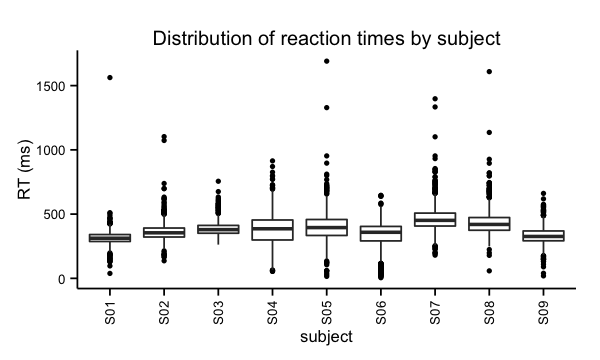

In [5]:
# load data
orig.data = read.csv("processed-data/0011-asrt-keyboard-10-processed.csv")

# convert seconds to ms
orig.data$RT = orig.data$RT*1000

# boxplot to inspect for outliers
ggplot(orig.data, aes(x=sid, y=RT)) + geom_boxplot(outlier.size = 1.5) + theme_classic(base_size=10) + 
    xlab('subject') + ylab('RT (ms)') + ggtitle('Distribution of reaction times by subject') + 
    theme(axis.text.x=element_text(angle=90,hjust=1,vjust=0.5))

# save figure locally
ggsave(paste(FIGPATH, '0011-distribution-rt-by-subject.png'), height = 3, width = 5)

We can see by looking at the data that there aren't any extremely ridiculous outliers.  In my opion, it actually makes more sense to leave these outliers in, rather than selecting some arbitrary cutoff criteria.  Later we are going to take the median RT, anyway, which is pretty resiliant to outliers.  These few outling points are hardly going to make a difference.  However, just to be consistent across studies, we will remove trials with RTs exceeding 1000ms. 

In [6]:
# remove trials with RT greater than or equal to 1000ms
data.rm.extrmRT = subset(orig.data, RT <= 1000)

# figure out how much data was lost
n.outliers = nrow(orig.data) - nrow(data.rm.extrmRT)
data.loss = n.outliers/nrow(orig.data) * 100 
cat("Number of outliers: ", n.outliers, "  Data loss: ", data.loss, "%")

Number of outliers:  10   Data loss:  0.1388889 %


#### Remove participants with accuracy below 80%
Next we will remove participants with overall accuracy below 80%.

In [7]:
# make function to compute percent correct (pcntc)
pcnt.correct = function (x) return (sum(x)/length(x)*100)

# get the overall accuracy for each subject and inspect
overall.acc = summaryBy(isCorrect ~ sid, data = data.rm.extrmRT, FUN = pcnt.correct)
print(overall.acc)

  sid isCorrect.pcnt.correct
1 S01               90.48811
2 S02               96.36591
3 S03               99.25000
4 S04               78.62500
5 S05               84.33584
6 S06               81.12500
7 S07               95.85947
8 S08               91.85464
9 S09               82.00000


We can see that only one subject (S04) has overall accuracy below 80%.  Let's remove that participant to complete our data cleaning.

In [55]:
# remove subjects below 80%
data.rm.lowAcc = subset(data.rm.extrmRT, sid != "S04")

# Check how much data was lost
n.outliers = nrow(data.rm.extrmRT) - nrow(data.rm.lowAcc)
data.loss = n.outliers/nrow(data.rm.extrmRT) * 100 
cat("Number of outliers: ", n.outliers, "  Data loss: ", data.loss, "%")

Number of outliers:  800   Data loss:  11.12656 %

We see that this results in a bit more data loss (quite a bit in my opinion).  It is still a reasonable number, but I don't love it.  We could probably have left this person in without effecting our overall results at all.  Going forward, a better way of handling this is probably adding accuracy as predictor in our model (instead of excluding people based on accuracy criteria).  

### Accuracy

Now we can compute mean accuracy by block for the remaining 8 subjects.  Note that the graph below is presenting values between 80 and 96%.  This is to help demonstrate some nuanced differences in accuracy across blocks (especially between blocks 1 and 2).  It is important to keep in mind that, in general, participants maintain extremely high accuracy across all blocks.

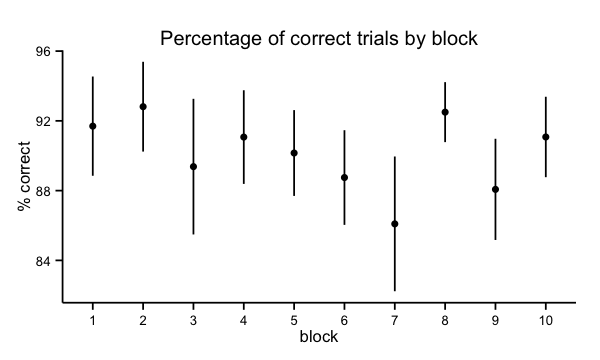

In [56]:
# compute each subject's % correct by block
acc.sid.block = summaryBy(isCorrect ~ sid*block, data = data.rm.lowAcc, FUN = pcnt.correct )

# plot mean % correct by block
ggplot(acc.sid.block, aes(factor(block), isCorrect.pcnt.correct)) +
    stat_summary(fun.data = mean_se, size = 0.5, geom="pointrange", position = "dodge") +
    theme_classic(10) + theme(legend.position = "bottom") +
    xlab("block") + ylab("% correct") + ggtitle("Percentage of correct trials by block")
# save figure locally
ggsave(paste(FIGPATH, '0011-accuracy-by-block.png'), height = 3, width = 5)

### Reaction time 


Next we will analyze the reaction time data for our remaining 8 subjects.  To do so, we need to first do a bit more data cleaning (Howard & Howard, 1997)

#### Remove reps and trills
Up to this point in our analysis, we have already reduced the data twice.  First we removed any data points beyond 1000 ms (outliers).  Then we removed any subjects who had an overall accuracy score of below 80%.  Both of these reduction strategies are standard, and I do not have any particular qualms about them (except that I think they are probably unnecessary an could be handled in other ways.

Howard & Howard (and others) recommend further data reduction and routinely perform the following on their analyses.  For this experiment, as we are attempting to replicated the Howards’, I will also follow these reduction strategies.  However, I highlight that a substantial number of trials are lost with these reduction techniques and suggested we find alternative methods in the future.


#### Remove incorrect trials
First remove any incorrect trials, as recommended by Howard & Howard, 1997.  This is an important step that should probably not be skipped.  Incorrect trials cannot be interpreted.  Still, one can see that this removes quite a large number of trials, even in our participants with high (80% or higher) accuracy.


In [57]:
# used the previously cleaned data set and additionally remove incorrect trials
data.rm.incorrect = subset(data.rm.lowAcc, isCorrect == 1)

# Check how much data was lost 
n.outliers = nrow(data.rm.lowAcc) - nrow(data.rm.incorrect)
data.loss = n.outliers/nrow(data.rm.lowAcc) * 100 
cat("Number of outliers: ", n.outliers, "  Data loss: ", data.loss, "%")


Number of outliers:  629   Data loss:  9.843505 %

Based on the Howard's analysis strategy, we should also remove "repetitions" (e.g. 111), "trills" (e.g. 121), and "doubles" (e.g. 311). The rational is that people have pre-existing response tendencies to these kinds of triplets (Boyer, Destrebecqz,& Cleeremans, 2005; Cleeremans & McClelland, 1991; Howard Jr. et al., 2008).

I actually think this is probably necessary for the study designs like the Howards.  They can't actually control (or counterbalance) these kinds of triplets - it is the nature of the task that "random" trials are truely random, and these types of trials cannot be interpreted.

However, as you'll see, this results in substantial data loss.

In [59]:
#remove reps, trills, and doubles (e.g. 111, 121, 311)
data.rm.reps = subset(data.rm.incorrect, isRep == "False")
n.outliers = nrow(data.rm.incorrect) - nrow(data.rm.reps)
data.loss = n.outliers/nrow(data.rm.incorrect) * 100 
cat("Number of outliers: ", n.outliers, "  Data loss: ", data.loss, "%")


Number of outliers:  2062   Data loss:  35.7924 %

#### Raw RT


With the cleaned data set, we calcuate median RT for each participant for each block and then take the mean of those median RTs (Howard & Howard, 1997) .

##### Median RT by subject by block
We can plot the median RT for each participant for each block, which gives us each participants learning curve.

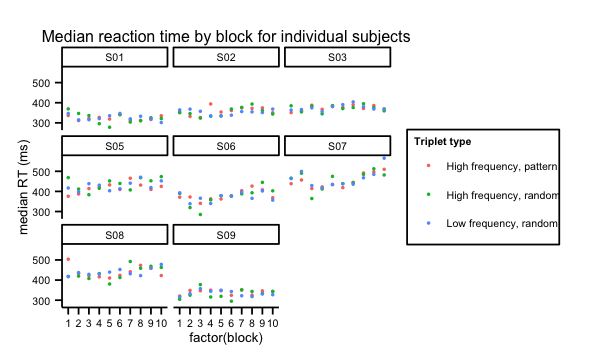

In [60]:
# individual subject data for mean of median RT
medianRT.block = summaryBy(RT ~ sid*block*f_type, data = data.rm.reps, FUN = median, var.name = "block")

# plot median RT by subject
ggplot(medianRT.block, aes(factor(block), block.median, ymax = max(block.median), colour=f_type)) + 
    geom_point(stat="identity", position = "dodge", size = 1) +
    facet_wrap(~sid) + theme_classic(base_size=8) + ylab("median RT (ms)") +
    ggtitle("Median reaction time by block for individual subjects") +
    theme(legend.background = element_rect(colour = "black")) +
    scale_colour_discrete(name = "Triplet type",
                         breaks = c("HF-pattern", "HF-random", "LF-random"),
                         labels = c("High frequency, pattern", "High frequency, random", "Low frequency, random"))

ggsave(paste(FIGPATH, '0011-median-RT-by-subject-raw.png'), height = 3, width = 5)

This looks not so great - we can see that each participant has a different learning curve, but there really isn't a discernable difference between different types.  
##### Mean of median RT

Now we can compute the mean of median reaction times by block to show the group learning effects.  I am not optomistic there will be any.

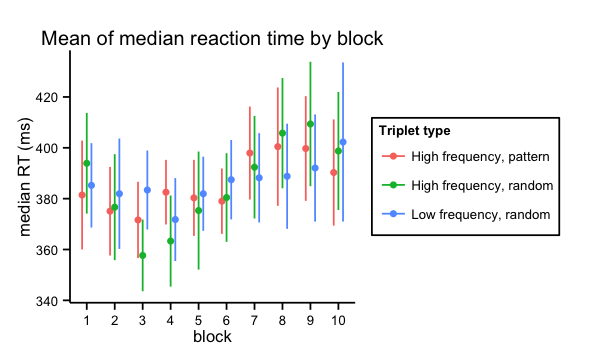

In [61]:
# plot the mean of median RT
ggplot(medianRT.block, aes(factor(block), block.median, colour=f_type)) + 
    stat_summary(fun.data=mean_se, size = 0.5, geom= "pointrange", position = position_dodge(width=0.5)) +
    theme_classic(base_size=10) + ylab("median RT (ms)") + xlab("block") +
    ggtitle("Mean of median reaction time by block") +
    theme(legend.background = element_rect(colour = "black")) +
    scale_colour_discrete(name = "Triplet type",
                         breaks = c("HF-pattern", "HF-random", "LF-random"),
                         labels = c("High frequency, pattern", "High frequency, random", "Low frequency, random"))

ggsave(paste(FIGPATH, '0011-mean-of-median-RT-raw.png'), height = 3, width = 5)

Yeah - it really looks like nobody is learning.  Standard error bars are 50 ms long in some cases (which is huge).  There aren't that many subjects and this wasn't very long for a harder study. Maybe it just isn't enough time for them to learn the alternating pattern.

#### Normalized RT

The most popular options for normalizing RT data in the literature are proportional transformations and z-score transformations.  Z-score transforms are preferred (by us and other labs), because proportional transforms are not as good at controlling for differences in processing speed (age-related or otherwise).  This is because proportional transformations assume that the function relating processing speed between two groups is linear, with an intercept of zero, which is not always valid (e.g. Chris, et al, 2001; Faust, Balota, Speiler, & Ferrar, 1999).

##### Compute median modified z-score
To compute z-score, we follow what has been suggested previously (e.g. Praat, Abrams, & Chasteen, 1997), with modifications for computing z-scores based on median and median absolute deviations (rather than mean and standard deviation):

 - For each participant, we computed an overall median RT and median absoulte deviation (MAD)
 - Then, we subtracted this overall median RT from the participant’s median RT for each block.
 - We multiplied this result by the constant 0.6745, as recommended by Iglewicz & Hoaglin (1993) for z-scored medians.
 - Then we divided this value by the participant’s overall median absolute deviation (MAD) (again, as Iglewicz & Hoaglin suggest).


In [62]:
# compute overall median RT and MAD from correct trials
medianRT.overall = summaryBy(RT ~ sid, data = data.rm.reps, FUN = list(median, mad), var.name = "overall")

# subtract overall median RT from block median RT by participant
z.data = merge(medianRT.block, medianRT.overall, by = 'sid')

# compute median modified z-score
z.data$z.RT = (0.6745*(z.data$block.median - z.data$overall.median))/z.data$overall.mad

##### Median RT by subject by block
Now we can once again plot by block for each individual, this time with the normalized RT.


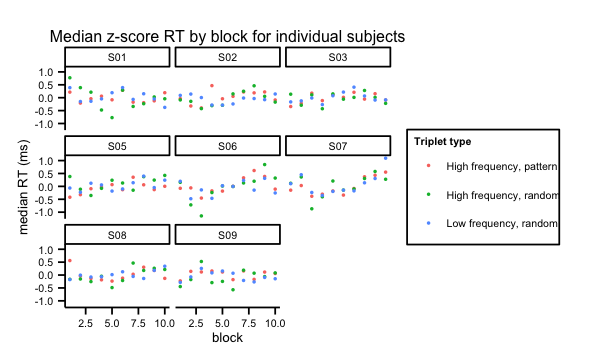

In [65]:
# plot median RT by subject
ggplot(z.data, aes(block, z.RT, ymax = max(z.RT), colour=f_type)) + 
       geom_point(stat="identity", position = "dodge", size = 1) +
       facet_wrap(~sid) + theme_classic(base_size=8) + ylab("median RT (ms)") +
       ggtitle("Median z-score RT by block for individual subjects") +
    theme(legend.background = element_rect(colour = "black")) +
    scale_colour_discrete(name = "Triplet type",
                         breaks = c("HF-pattern", "HF-random", "LF-random"),
                         labels = c("High frequency, pattern", "High frequency, random", "Low frequency, random"))

ggsave(paste(FIGPATH, '0011-median-RT-by-subject-zscore.png'), height = 3, width = 5)


##### Mean of median RT
Now we can compute the mean of these z transformed median reaction times by block to show the group learning effects.

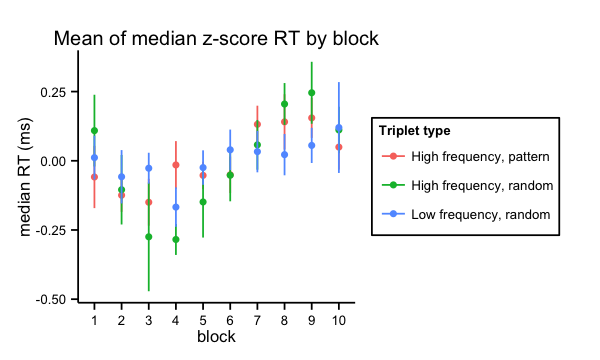

In [66]:
# plot the mean of z RT
ggplot(z.data, aes(factor(block), z.RT, colour = f_type)) + 
    stat_summary(fun.data=mean_se, size = 0.5, geom= "pointrange", position = "dodge") +
    theme_classic(base_size=10) + ylab("median RT (ms)") + xlab("block")+
    ggtitle("Mean of median z-score RT by block") +
    theme(legend.background = element_rect(colour = "black")) +
    scale_colour_discrete(name = "Triplet type",
                         breaks = c("HF-pattern", "HF-random", "LF-random"),
                         labels = c("High frequency, pattern", "High frequency, random", "Low frequency, random"))

ggsave(paste(FIGPATH, '0011-mean-of-median-RT-zscore.png'), height = 3, width = 5)

## Conclusions & next steps

### People can't learn this
Now let's take a look at the overal median and mad for each partipant, just to inspect things a little bit.  We see that everybody has pretty high median reaction times

In [67]:
print(medianRT.overall)

  sid overall.median overall.mad
1 S01       323.7541    39.82299
2 S02       357.1155    53.06910
3 S03       375.1588    47.94418
4 S05       424.4391    78.03605
5 S06       377.0888    54.16471
6 S07       453.3570    68.99723
7 S08       437.7019    79.29992
8 S09       337.8670    50.65289


### Next steps
We acheived our original goal of replicating an SRT paradigm.  We know that Katie's paradigm is working, and we can move on to replicating the alternating serial reaction time task. (aSRT task)

## Important files
Files can be found on Katie's local computer at the path described, or you can access it on dropbox by clicking the link. All local paths are relative to `/Users/kathrynschuler/Documents/research-gu/`

- [Summary](): `summaries/0010-srt-pilot.pdf`
- [Stimuli](https://www.dropbox.com/sh/zfs3kwopxgktvff/AAA665qHEAr6Rp4DEB4nMH9ga?dl=0): `stimuli/0010-str-pilot-stims/`
- [Experiment](https://www.dropbox.com/sh/3zrqr371ldw5gu0/AAAjxrHccjPTZ-Re_0dZD-SGa?dl=0): `experiment-code/0010-srt-pilot-exp/`
- [Subject tracking](https://www.dropbox.com/s/lak50vpz35yx5he/0010-SRT-pilot-track.csv?dl=0): `subject-tracking/0010-srt-pilot-track.csv`
- [Raw data](https://www.dropbox.com/sh/m1ixi64n28j4k8t/AADeh5hFw25EvvfVMtOxZhwRa?dl=0): `raw-data/0010-srt-pilot-data`
- [Analysis](https://www.dropbox.com/sh/8m5td0y7w39ox6j/AACp3fAxtvg9v1_WyPpNe7MCa?dl=0): `analyses/0010-srt-pilot-analysis/`
- [Figures](https://www.dropbox.com/sh/ex3ma6g4u124bi7/AACZct7dUlb4hfPqruhaoa1oa?dl=0): `figures/0010-srt-pilot-figs/`



In [68]:
# create a 3rd order polynomial
t <- poly(unique(z.data$block), 4)


# create orthogonal polynomial time variables in the data frame
z.data[,paste("ot", 1:4, sep="")] <- t[z.data$block, 1:4]

# fit the full model
m.TP <- lmer(modz.mean ~ (ot1+ot2+ot3+ot4) + (ot1+ot2+ot3+ot4 | sid),
	control = lmerControl(optimizer="bobyqa"), 
	data = z.data, REML=FALSE)

ERROR: Error in eval(expr, envir, enclos): could not find function "lmer"
